# Final Project 

## Comparing Classification Methods between Logistic Regression, SVM, Random Forest, K-NN and Naive-Bayes 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Notes : 


        M >> Malignant (Ganas)

        B >> Benign (Jinak)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Data Visualization

In [6]:
CAT = [i for i in df.select_dtypes(include = 'object')]
CAT

['diagnosis']

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


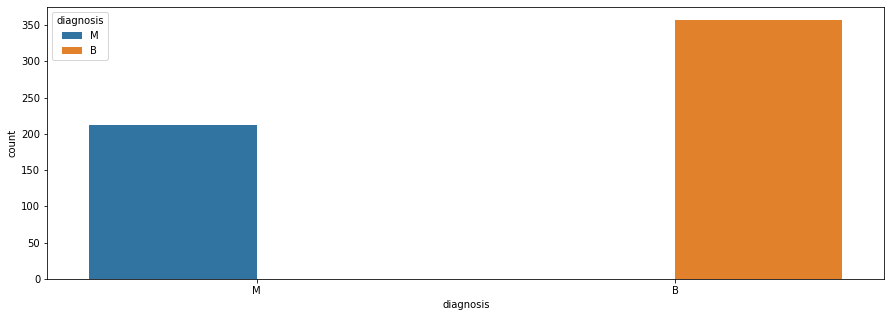

In [7]:
for i in CAT :
    plt.figure(figsize = (15,5))
    sns.countplot(df[i],
                 data = df,
                 hue = 'diagnosis')
    plt.show()

## Preprocessing

In [8]:
df = df.drop('Unnamed: 32',axis = 1)
df = df.drop('id',axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

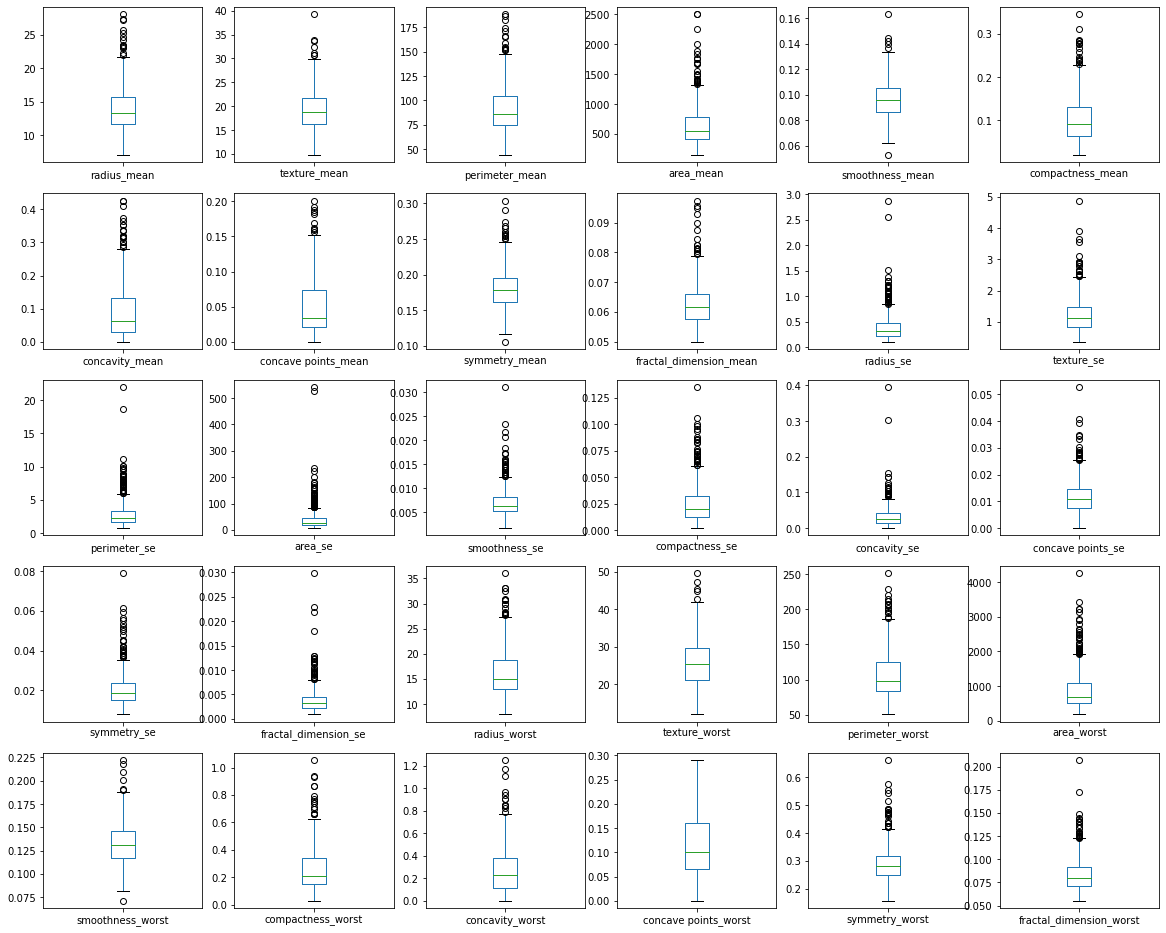

In [9]:
df.plot(kind = "box", subplots =True, layout = (6,6), sharex = False, sharey = False, figsize=(20,20))
plt.show()

In [10]:
features = df.iloc[:,0:31]
features = features.drop('diagnosis',axis = 1)
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
from scipy import stats

z = np.abs(stats.zscore(features._get_numeric_data()))
not_outlier = df[(z < 3).all(axis = 1)]
print(not_outlier.shape)

(495, 31)


In [12]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [not_outlier.shape[0], df.shape[0]-not_outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,495
1,Outlier,74


### Overcoming the existance outlier 

In [13]:
from sklearn.preprocessing import StandardScaler

features_std= StandardScaler().fit_transform(features)
features_std= pd.DataFrame(features)
features_std.columns = features.columns.tolist()
features_std

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
z = np.abs(stats.zscore(features_std._get_numeric_data()))
not_outlier = features_std[(z < 3).all(axis = 1)]
print(not_outlier.shape)

(495, 30)


In [15]:
pd_outlier = pd.DataFrame([])
pd_outlier["Notes"] = ["Not Outlier","Outlier"]
pd_outlier["Number of Observations"] = [not_outlier.shape[0], features_std.shape[0]-not_outlier.shape[0]]
pd_outlier

,Notes,Number of Observations
0,Not Outlier,495
1,Outlier,74


There is no different between standardized data and the original

<AxesSubplot:>

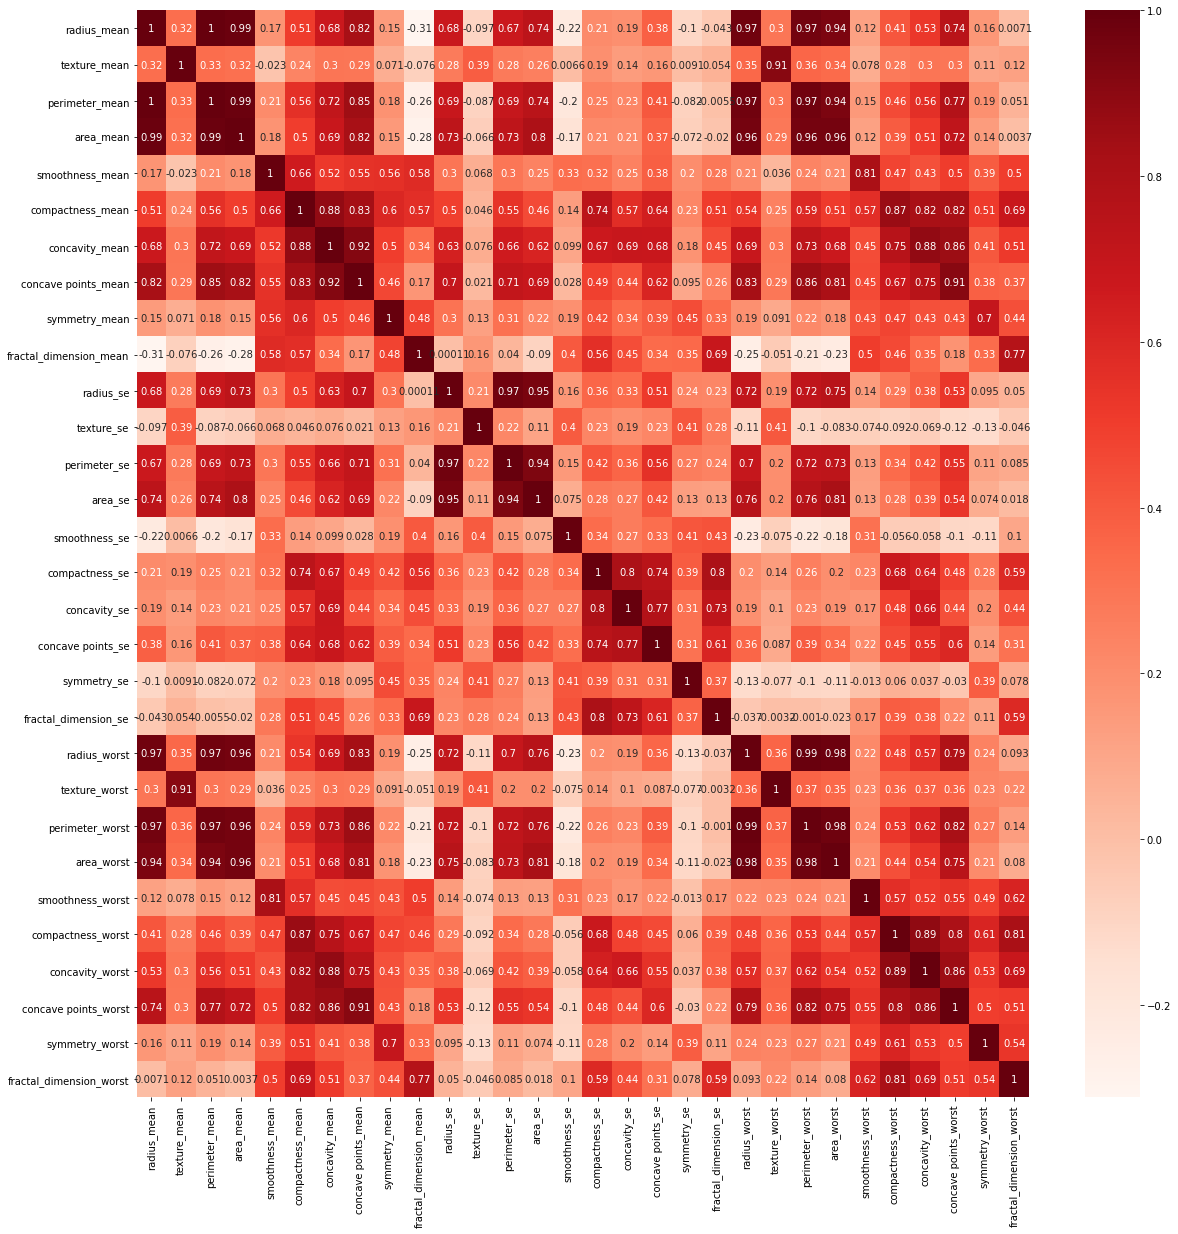

In [16]:
 corr1 = features_std.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr1,annot=True,cmap=plt.cm.Reds,ax=ax)

Because of linear combination exist which cause the information obtained from the predictor variables to be not optimal. For example: deceptive parameter significance, the highest value of R-square. Then ,we doing variable reduction technique using priciple component analyst (PCA).

### Calculating n-PCA number

In [17]:
# Calculating eigen value and eigen vector from correlation matrix
import scipy.linalg as la
eigen_value, eigen_vector = la.eig(corr1)

# getting eigen value in complex number
eigen_value

array([1.32816077e+01+0.j, 5.69135461e+00+0.j, 2.81794898e+00+0.j,
       1.98064047e+00+0.j, 1.64873055e+00+0.j, 1.20735661e+00+0.j,
       6.75220114e-01+0.j, 4.76617140e-01+0.j, 4.16894812e-01+0.j,
       3.50693457e-01+0.j, 2.93915696e-01+0.j, 2.61161370e-01+0.j,
       2.41357496e-01+0.j, 1.57009724e-01+0.j, 9.41349650e-02+0.j,
       7.98628010e-02+0.j, 5.93990378e-02+0.j, 5.26187835e-02+0.j,
       4.94775918e-02+0.j, 1.33044823e-04+0.j, 7.48803097e-04+0.j,
       1.58933787e-03+0.j, 6.90046388e-03+0.j, 8.17763986e-03+0.j,
       1.54812714e-02+0.j, 1.80550070e-02+0.j, 2.43408378e-02+0.j,
       2.74394025e-02+0.j, 3.11594025e-02+0.j, 2.99728939e-02+0.j])

In [18]:
# getting ideal number of PC
eigen_value[eigen_value > 1]

array([13.28160768+0.j,  5.69135461+0.j,  2.81794898+0.j,  1.98064047+0.j,
        1.64873055+0.j,  1.20735661+0.j])

From the results above, it is found that there are 6 values of eigenvalues that exceed the value of 1. That means the ideal PC that can be formed is 6 pieces.

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalcomponents = pca.fit_transform(features_std) # using standardized data
new_df = pd.DataFrame(principalcomponents)
new_df.columns = ['PC1','PC2','PC3','PC4',"PC5",'PC6']
new_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160
...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,-0.395424
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,-0.059637
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,-0.870726
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,4.086390


<AxesSubplot:>

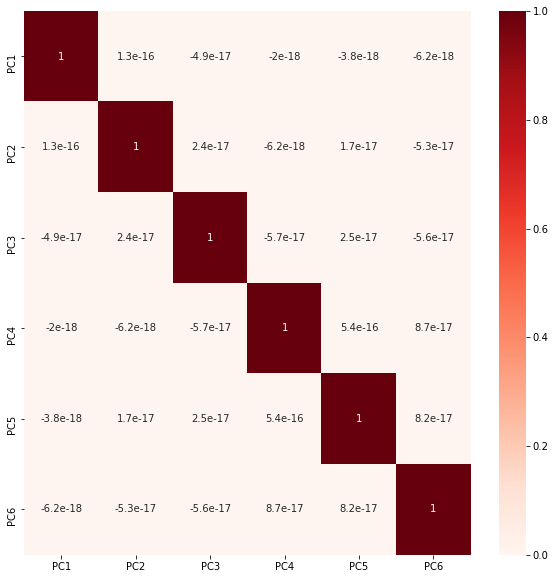

In [20]:
# Checking new_df correlation features
corr = new_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,annot=True,cmap=plt.cm.Reds,ax=ax)

## Prepare data 

In [21]:
new_df['diagnosis'] = df['diagnosis']
new_df

,PC1,PC2,PC3,PC4,PC5,PC6,diagnosis
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,M
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,M
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,M
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,M
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,M
...,...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,-0.395424,M
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,-0.059637,M
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,-0.870726,M
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,4.086390,M


In [22]:
new_df.iloc[:,:6]

,PC1,PC2,PC3,PC4,PC5,PC6
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160
...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,-0.395424
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,-0.059637
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,-0.870726
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,4.086390


In [23]:
new_df.iloc[:,-1]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [24]:
from sklearn.model_selection import train_test_split

x = new_df.iloc[:,:6]
y = new_df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 6)
(455,)
(114, 6)
(114,)


# Classification using Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_predict = logreg.predict(x_test)
cm = confusion_matrix(y_predict, y_test)
print(cm)
print('\n')
print(f'akurasi Logistic Regression : {logreg.score(x_test, y_test)*100} %')

[[65  4]
 [ 1 44]]


akurasi Logistic Regression : 95.6140350877193 %


# Classification using SVM  

#### Linear kernel 

In [26]:
from sklearn import svm
svm1 = svm.SVC(kernel = 'linear')

In [27]:
svm1.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
y_pred = svm1.predict(x_test)

In [29]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
print('\n')
print(f'akurasi SVM linear kernel : {svm1.score(x_test, y_test)*100} %')

[[65  6]
 [ 1 42]]


akurasi SVM linear kernel : 93.85964912280701 %


#### RBF Kernel 

In [30]:
svm2 = svm.SVC(kernel = 'rbf')
svm2.fit(x_train,y_train)
y_pred2 = svm2.predict(x_test)
cm = confusion_matrix(y_pred2, y_test)
print(cm)
print('\n')
print(f'akurasi SVM rbf kernel : {svm2.score(x_test, y_test)*100} %')

[[65 12]
 [ 1 36]]


akurasi SVM rbf kernel : 88.59649122807018 %


#### Using GridSearch CV 

In [31]:
from sklearn.model_selection import GridSearchCV #mencari parameter optimal
from sklearn.metrics import make_scorer #mencari make score

svm_tune = svm.SVC()
scorer = make_scorer(accuracy_score, greater_is_better = True)
parameters = {
    'C' : [0, 0.001, 0.01, 0.1, 0,5],
    'kernel' : ['linear', 'rbf'],
    'gamma' : [0.1, 0.5, 1, 1.1]
}

#svm_grid = GridSearchCV(svm1, parameters, n_jobs = 1, cv = 5)
svm_grid = GridSearchCV(svm_tune, param_grid = parameters, scoring = scorer, cv = 5)
svm_grid.fit(x, y)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Est

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Est

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 0.001, 0.01, 0.1, 0, 5],
                         'gamma': [0.1, 0.5, 1, 1.1],
                         'kernel': ['linear', 'rbf']},
             scoring=make_scorer(accuracy_score))

In [32]:
print('Best Parameter :', svm_grid.best_params_)
print('Best Score     :', svm_grid.best_score_)

Best Parameter : {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score     : 0.9490607048594939


In [33]:
svm3 = svm.SVC(C = 0.1 ,gamma = 0.1 ,kernel = 'linear')
svm3.fit(x_train,y_train)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [34]:
y_pred3 = svm3.predict(x_test)
cm = confusion_matrix(y_pred3, y_test)
print(cm)
print('\n')
print(f'akurasi SVM with tuning parameter : {svm3.score(x_test, y_test)*100} %')

[[65  6]
 [ 1 42]]


akurasi SVM with tuning parameter : 93.85964912280701 %


# Classification using Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred4 = rf.predict(x_test)
cm = confusion_matrix(y_pred4, y_test)
print(cm)
print('\n')
print(f'akurasi Random Forest: {rf.score(x_test, y_test)*100} %')

[[66  7]
 [ 0 41]]


akurasi Random Forest: 93.85964912280701 %


<AxesSubplot:>

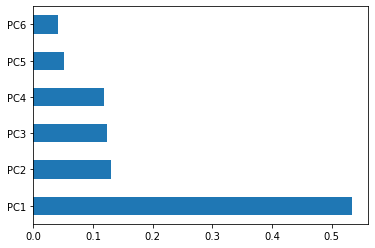

In [36]:
diagnose = ['diagnosis']
X_ = np.array([i for i in new_df.columns.values.tolist() if i not in diagnose])
importance_scores = rf.feature_importances_
indices = np.argsort(importance_scores)

feature_importances = pd.Series(rf.feature_importances_, index=X_)
feature_importances.nlargest(6).plot(kind='barh')

In [37]:
print(feature_importances)

PC1    0.534333
PC2    0.130378
PC3    0.123555
PC4    0.118545
PC5    0.051440
PC6    0.041748
dtype: float64


# Classification using K-Nearest Neighbor

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', p = 2)
model.fit(x_train, y_train)
y_pred5 = model.predict(x_test)

cm = confusion_matrix(y_pred5, y_test)
accuracy4 = accuracy_score(y_pred5, y_test)

print(cm)
print('\n') # enter
print(f'akurasi K-NN : {accuracy4*100} %')

[[64 10]
 [ 2 38]]


akurasi K-NN : 89.47368421052632 %


#### Using GridSearch CV

In [39]:
from sklearn.model_selection import GridSearchCV #mencari parameter optimal
from sklearn.metrics import make_scorer #mencari make score

model = KNeighborsClassifier()
scorer = make_scorer(accuracy_score, greater_is_better = True)
parameters = [{'n_neighbors': [3,5,7,9,11,13,15,17],
              'weights' : ['uniform', 'distance'],
              'p' : [1,2]}]

model_gscv = GridSearchCV(model, param_grid = parameters, scoring = scorer, cv = 5)
model_gscv.fit(x, y)
print('Best Parameter :', model_gscv.best_params_)
print('Best Score     :', model_gscv.best_score_)

Best Parameter : {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best Score     : 0.9402577239559076


In [40]:
cv_result = pd.DataFrame(model_gscv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003001,0.000619,0.010363,0.006472,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.912281,0.947368,0.956140,0.956140,0.920354,0.938457,0.018535,4
1,0.003191,0.000977,0.015859,0.025742,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",0.912281,0.938596,0.956140,0.956140,0.929204,0.938472,0.016711,3
2,0.002585,0.000500,0.005592,0.001190,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.877193,0.921053,0.947368,0.938596,0.902655,0.917373,0.025277,32
3,0.003000,0.000644,0.002784,0.001161,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.877193,0.929825,0.947368,0.947368,0.911504,0.922652,0.026321,31
4,0.003094,0.001016,0.005585,0.001196,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.885965,0.929825,0.956140,0.956140,0.929204,0.931455,0.025674,18
5,0.002992,0.001545,0.002799,0.000403,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.885965,0.921053,0.956140,0.956140,0.929204,0.929700,0.026023,24
6,0.002612,0.000503,0.005759,0.000967,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.885965,0.938596,0.938596,0.947368,0.929204,0.927946,0.021763,28
7,0.002194,0.000401,0.002793,0.000401,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",0.894737,0.938596,0.938596,0.947368,0.929204,0.929700,0.018402,24
8,0.003576,0.001354,0.006596,0.001846,7,1,uniform,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}",0.885965,0.938596,0.956140,0.956140,0.929204,0.933209,0.025802,14
9,0.003157,0.001473,0.002577,0.000507,7,1,distance,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}",0.885965,0.938596,0.956140,0.956140,0.938053,0.934979,0.025770,9


In [41]:
model = KNeighborsClassifier(n_neighbors = 11, weights = 'uniform', p = 1)
model.fit(x_train, y_train)
y_pred6 = model.predict(x_test)

cm = confusion_matrix(y_pred6, y_test)
accuracy5 = accuracy_score(y_pred6, y_test)

print(cm)
print('\n') # enter
print(f'akurasi K-NN with tuning parametes : {accuracy5*100} %')

[[66  9]
 [ 0 39]]


akurasi K-NN with tuning parametes : 92.10526315789474 %


# Classification using Naive Bayes 

In [42]:
bayes_df = new_df

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bayes_df['diagnosis'] = le.fit_transform(bayes_df["diagnosis"])
bayes_df

,PC1,PC2,PC3,PC4,PC5,PC6,diagnosis
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,1
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,1
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,1
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,1
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,1
...,...,...,...,...,...,...,...
564,1414.126684,110.222492,40.065944,6.562240,-5.102856,-0.395424,1
565,1045.018854,77.057589,0.036669,-4.753245,-12.417863,-0.059637,1
566,314.501756,47.553525,-10.442407,-9.771881,-6.156213,-0.870726,1
567,1124.858115,34.129225,-19.742087,-23.660881,3.565133,4.086390,1


Notes : 


        1 >> M >> Malignant (Ganas)

        0 >> B >> Benign (Jinak)

In [44]:
x2 = bayes_df.iloc[:,:6]
y2 = bayes_df.iloc[:,-1]

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 12)
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(455, 6)
(455,)
(114, 6)
(114,)


In [45]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train2,y_train2)

GaussianNB()

In [46]:
y_pred7 = model.predict(x_test2)
cm = confusion_matrix(y_pred7, y_test2)
accuracy6 = accuracy_score(y_pred7, y_test2)

print(cm)
print('\n') # enter
print(f'akurasi Naive-Bayes : {accuracy6*100} %')

[[62 13]
 [ 4 35]]


akurasi Naive-Bayes : 85.08771929824562 %


# Comparing each method 

In [47]:
from sklearn.metrics import classification_report

print('-----------------------------------------------------------------------------')
print(f'akurasi Logistic Regression : {logreg.score(x_test, y_test)*100} %')
print('\n')
cr0 = classification_report(y_test, y_predict)
print(cr0)
print('-----------------------------------------------------------------------------')
print(f'akurasi SVM linear kernel : {svm1.score(x_test, y_test)*100} %')
print('\n')
cr = classification_report(y_test, y_pred)
print(cr)
print('-----------------------------------------------------------------------------')
print(f'akurasi SVM rbf kernel : {svm2.score(x_test, y_test)*100} %')
print('\n')
cr2 = classification_report(y_test, y_pred2)
print(cr2)
print('-----------------------------------------------------------------------------')
print(f'akurasi SVM with tuning parameter : {svm3.score(x_test, y_test)*100} %')
print('\n')
cr3 = classification_report(y_test, y_pred3)
print(cr3)
print('-----------------------------------------------------------------------------')
print(f'akurasi Random Forest: {rf.score(x_test, y_test)*100} %')
print('\n')
cr4 = classification_report(y_test, y_pred4)
print(cr4)
print('-----------------------------------------------------------------------------')
print(f'akurasi K-NN : {accuracy4*100} %')
print('\n')
cr5 = classification_report(y_test, y_pred5)
print(cr5)
print('-----------------------------------------------------------------------------')
print(f'akurasi K-NN with tuning parametes : {accuracy5*100} %')
print('\n')
cr6 = classification_report(y_test, y_pred6)
print(cr6)
print('-----------------------------------------------------------------------------')
print(f'akurasi Naive-Bayes : {accuracy6*100} %')
print('\n')
cr7 = classification_report(y_test2, y_pred7)
print(cr7)
print('-----------------------------------------------------------------------------')

-----------------------------------------------------------------------------
akurasi Logistic Regression : 95.6140350877193 %


              precision    recall  f1-score   support

           B       0.94      0.98      0.96        66
           M       0.98      0.92      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

-----------------------------------------------------------------------------
akurasi SVM linear kernel : 93.85964912280701 %


              precision    recall  f1-score   support

           B       0.92      0.98      0.95        66
           M       0.98      0.88      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

-----------------------------------------------------------------------------
akurasi SVM